In [1]:
import numpy as np
import porepy as pp
import scipy.sparse as sps
import math 
import sys
sys.path.append("../class")
from Flow_class import Flow
from Transport_class import Transport
from Reaction_class import Reaction

In [2]:
Nx=30
Ny=30

In [3]:
#gb= pp.grid_buckets_2d.single_vertical([Nx, Ny], y_endpoints=[0.6, 0.2], simplex=False)
#gb, domain = pp.grid_buckets_2d.single_horizontal([Nx, Ny], x_endpoints=[0.2, 0.8], simplex=False)
#print(domain)
#pp.plot_grid(gb,figsize=[15,12])
#domain={'xmin': 0, 'xmax': 1, 'ymin': 0, 'ymax': 1}




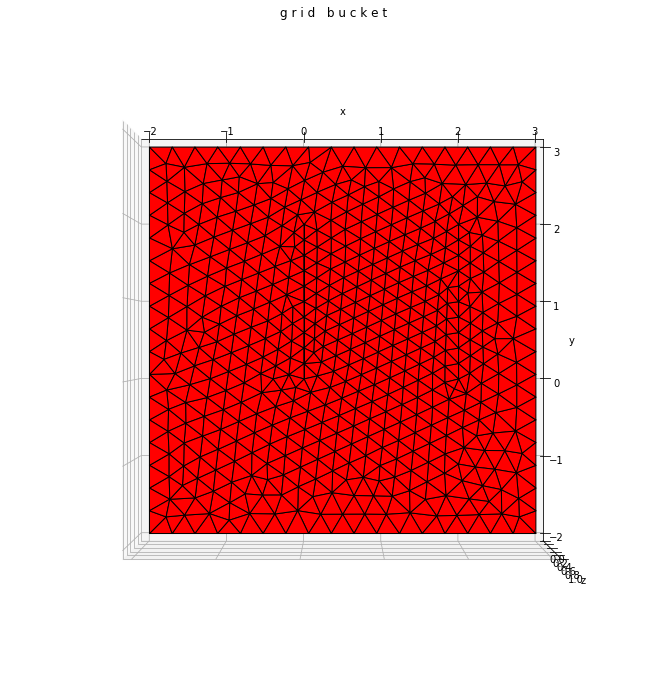

In [4]:
# Point coordinates, as a 2xn array
p = np.array([[0, 0, 2, 2], [0, 2, 2, 0]])
# Point connections as a 2 x num_frac arary
e = np.array([[0, 2], [1, 3]])

# The domain contains two fractures: The first from (0, 0) - (2,0), the second (1, 0) to (1, 1)
# Set domain boundaries
domain = {'xmin': -2, 'xmax': 3, 'ymin': -2, 'ymax': 3}

# Define a fracture network in 2d
network_2d = pp.FractureNetwork2d(p, e, domain)

# Set preferred mesh size close to the fracture, and at the boundary (essentially this is a far-field value)
mesh_args = {'mesh_size_frac': 0.2, 'mesh_size_bound': 0.3}

# Generate a mixed-dimensional mesh
gb = network_2d.mesh(mesh_args)
pp.plot_grid(gb,figsize=(15,12))


In [5]:
print(gb.edges())

<generator object GridBucket.edges at 0x7f0ca137df20>


In [6]:
parameter={"aperture":1e-3,
          "fracture_perm_2":0.00001,
          "fracture_perm_1":1e5,
          #"fracture_perm":1e5,
          #"fracture_perm":0.001,
          "perm":1,
          #"f_lambda":lambda x,y,z:math.pi*math.pi*2*math.sin(math.pi*x)*math.sin(math.pi*y),
          "f_lambda":lambda x,y,z:0.0,
          "bc_value":[1000.0,0.0],
          "bc_type":['dir','dir'],
          "method":"Tpfa"}

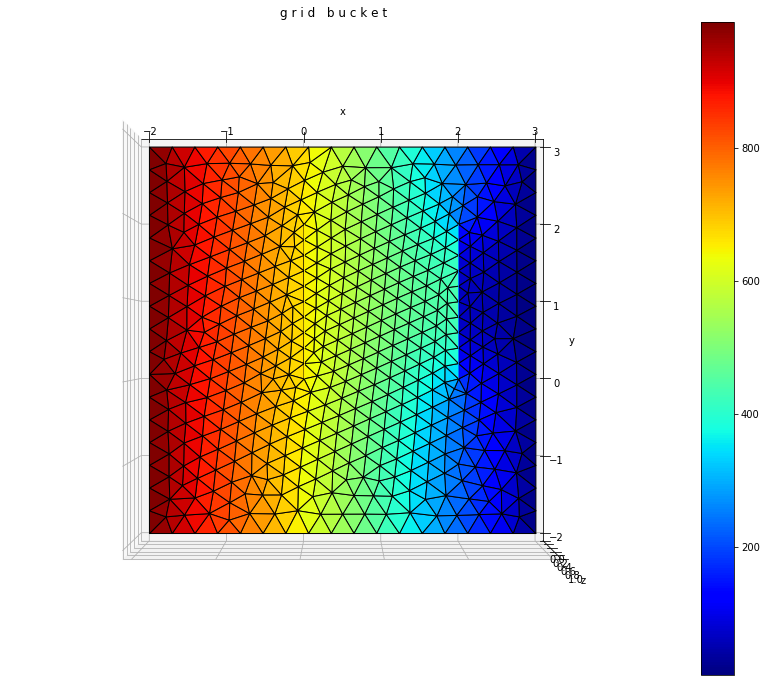

In [7]:
flow=Flow(gb,domain,parameter)
#flow.add_data()
flow.set_data()
flow.discretize()
flow.solve()
flow.plot_pressure()

In [8]:
parameter={
    "aperture":1e-4,
    "por":0.2,
    "por_frac":0.8,
    #"time_step":1 / 60,
    #"time_step":34.56,
    "time_step":0.001,
    #"t_max":1 /3,
    #"t_max":345600,
    "t_max":0.1,
    "initial_cond":lambda x,y,z:0.0}

transport=Transport(gb,domain,parameter)

In [9]:
Ca_value=[1.0,0.0]
Ca_type=['dir','dir']
Ca="Ca"

In [10]:
transport.set_data(Ca_value,Ca_type,Ca)
transport.get_flux(Ca)
transport.discretize(Ca)
lhs_Ca,rhs_source_adv_Ca,rhs_mass_Ca,assembler_Ca=transport.get_transport_lhs_rhs(Ca)


mass
  (0, 0)	0.0032975146941769066
  (1, 1)	0.003493673786558245
  (2, 2)	0.008200312959542386
  (3, 3)	0.0047165659207641
  (4, 4)	0.003701371714603623
  (5, 5)	0.0068941954954832565
  (6, 6)	0.007496826564101617
  (7, 7)	0.007374691834907099
  (8, 8)	0.0062573622209871615
  (9, 9)	0.0064683025205800665
  (10, 10)	0.004856291038468623
  (11, 11)	0.007679492208966442
  (12, 12)	0.007305968527717893
  (13, 13)	0.003977266012549767
  (14, 14)	0.0038911963448390943
  (15, 15)	0.0034423653684547834
  (16, 16)	0.006881264629740605
  (17, 17)	0.006848859906402724
  (18, 18)	0.005357917281543577
  (19, 19)	0.006141326673641912
  (20, 20)	0.005899837214806022
  (21, 21)	0.004517484371510892
  (22, 22)	0.003937952012880669
  (23, 23)	0.005544580528772549
  (24, 24)	0.006865371831998976
  :	:
  (1007, 1007)	0.005145381827380328
  (1008, 1008)	0.004702086539108337
  (1009, 1009)	0.0025455418560300968
  (1010, 1010)	0.0039037170963729835
  (1011, 1011)	0.0032073425420788867
  (1012, 1012)	1.59999

In [11]:
for g,d in gb:
    print(d[pp.PARAMETERS]["Ca"]["darcy_flux"])

[  0.         -28.5599037   -5.66172019 ...   0.           0.
   0.        ]
[  0.         -10.79778115 -12.40939498  -9.38047166  -7.61798927
  -7.00316302  -3.0361283    2.48723096   4.6060822    2.58837806
   0.        ]
[ 0.         -0.03083056 -0.0343731  -0.02596418 -0.00544335  0.00399849
  0.01097265  0.01390558  0.01167367  0.00417362  0.        ]


P0_flux
[[ 27.48886141 278.83320108 213.49882381 ...  23.99395588 197.19286471
   25.22792147]
 [ 32.48450663 424.36389853   7.55814178 ... -29.85773128 -23.83553316
  -13.4707699 ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]
P0_flux
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.39889057e+00 -1.16035881e+01 -1.08949333e+01 -8.49923047e+00
  -7.31057615e+00 -5.01964566e+00 -2.74448669e-01  3.54665658e+00
   3.59723013e+00  1.29418903e+00]
 [-5.99397262e-16 -1.28825706e-15 -1.20958058e-15 -9.43604136e-16
  -8.11636996e-16 -5.57292618e-16 -3.04699232e-17  3.93757980e-16
   3.99372772e-16  1.43683846e-16]]
P0_flux
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.54152812e-02  3.26018307e-02  3.01686415e-02  1.

/home/dell/anaconda3/lib/python3.8/site-packages/porepy/viz/plot_grid.py:127: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


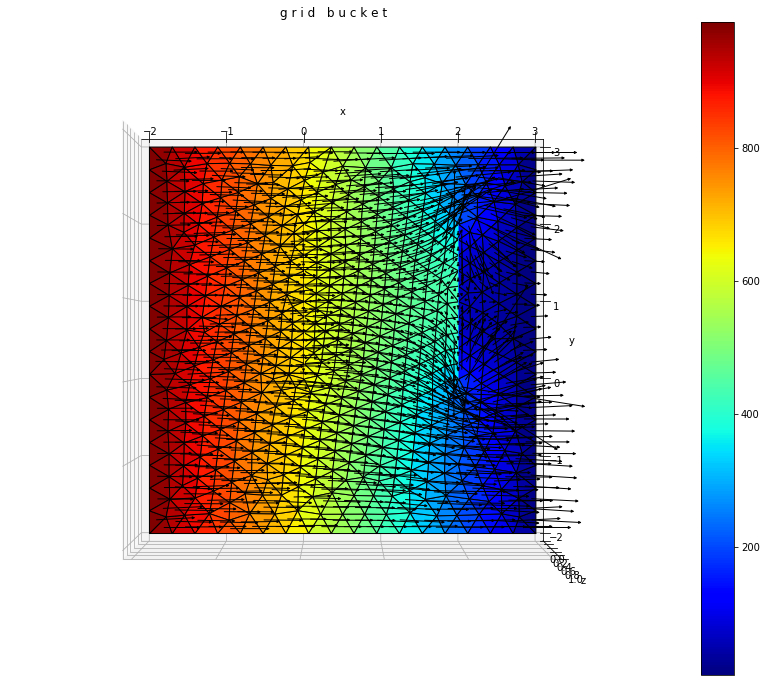

In [12]:
## to export the flux
key='Ca'
flux='darcy_flux'
mortar='mortar_flux'
flux_P0="P0_flux"

discr_P0_flux = pp.MVEM(key)
for g, d in gb:
    discr_P0_flux.discretize(g, d)
    d[pp.STATE][flux] = d[pp.PARAMETERS][key][flux]

## construct the P0 flux reconstruction
pp.project_flux(gb, discr_P0_flux, flux, flux_P0, mortar)

for g,d in gb:
    print("P0_flux")
    print(d[pp.STATE]["P0_flux"])

for g,d in gb:
    print("pressure")
    print(d[pp.STATE]["pressure"])
    
for g,d in gb:
    d[pp.STATE]["P0_flux"]*=0.003
pp.plot_grid(gb,"pressure","P0_flux",figsize=(15,12))

In [13]:
save_every = 1
n_steps = int(np.round(parameter["t_max"] / parameter["time_step"]))

# Initial condition
tracer1 = np.zeros(rhs_source_adv_Ca.size)
assembler_Ca.distribute_variable(
    tracer1, variable_names=[Ca,transport.mortar_variable]
)


# Exporter
exporter1 = pp.Exporter(gb, file_name="Ca", folder_name="Ca")
export_field1 = ["Ca"]
IEsolver_Ca = sps.linalg.factorized(lhs_Ca)

/home/dell/.local/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


Ca
[0. 0. 0. ... 0. 0. 0.]
Ca
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ca
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
FINE
Ca
[0.0012427  0.00640842 0.00874678 ... 0.00141886 0.03850771 0.00037242]
Ca
[0.10757316 0.10621142 0.1032205  0.10135904 0.10347188 0.107929
 0.11101104 0.10885734 0.10588429 0.10044026]
Ca
[0.00438591 0.00343075 0.0028513  0.00047755 0.00106334 0.0007885
 0.00146517 0.00193422 0.00249069 0.00336131]
FINE
Ca
[0.00872137 0.03585622 0.04791465 ... 0.00980066 0.15688579 0.00292094]
Ca
[0.33333072 0.33052295 0.32412954 0.32008014 0.3245734  0.33396156
 0.3405015  0.33576153 0.32925449 0.31736865]
Ca
[0.02600638 0.02109523 0.01798052 0.00366943 0.00758955 0.00573304
 0.01010452 0.01287247 0.01601446 0.0207254 ]
FINE
Ca
[0.03188504 0.10581585 0.13771517 ... 0.03525938 0.34535698 0.01191622]
Ca
[0.58322358 0.5801821  0.57298737 0.56834951 0.57336941 0.58377103
 0.59107891 0.58558739 0.57809119 0.5644292 ]
Ca
[0.08104477 0.06800713 0.05933092 0.01468257 0.02822419 0.02174442
 0.03630689 0.04

Ca
[0.99999395 0.99999887 1.         ... 0.99999282 1.         0.99988265]
Ca
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Ca
[0.9999981  0.99999726 0.999996   0.99998197 0.99999923 0.99996898
 0.99999055 0.99999407 0.99999591 0.99999731]
FINE
Ca
[0.99999628 0.9999993  1.         ... 0.99999589 1.         0.99992534]
Ca
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Ca
[0.99999892 0.99999844 0.99999773 0.99998984 0.99999963 0.99998084
 0.99999416 0.99999634 0.99999748 0.99999834]
FINE
Ca
[0.99999771 0.99999957 1.         ... 0.99999765 1.         0.99995253]
Ca
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Ca
[0.99999939 0.99999912 0.99999872 0.99999428 0.99999982 0.99998816
 0.99999639 0.99999774 0.99999844 0.99999897]
FINE
Ca
[0.99999859 0.99999973 1.         ... 0.99999866 1.         0.99996983]
Ca
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Ca
[0.99999965 0.9999995  0.99999928 0.99999679 0.99999991 0.99999269
 0.99999777 0.9999986  0.99999904 0.99999937]
FINE
Ca
[0.99999913 0.99999984 1.         ... 0.99999924 1.         0.99998083]
C

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
FINE
Ca
[1. 1. 1. ... 1. 1. 1.]
Ca
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Ca
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
FINE
Ca
[1. 1. 1. ... 1. 1. 1.]
Ca
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Ca
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
FINE
Ca
[1. 1. 1. ... 1. 1. 1.]
Ca
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Ca
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
FINE
Ca
[1. 1. 1. ... 1. 1. 1.]
Ca
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Ca
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
FINE
Ca
[1. 1. 1. ... 1. 1. 1.]
Ca
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Ca
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
FINE
Ca
[1. 1. 1. ... 1. 1. 1.]
Ca
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Ca
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
FINE
Ca
[1. 1. 1. ... 1. 1. 1.]
Ca
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Ca
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
FINE


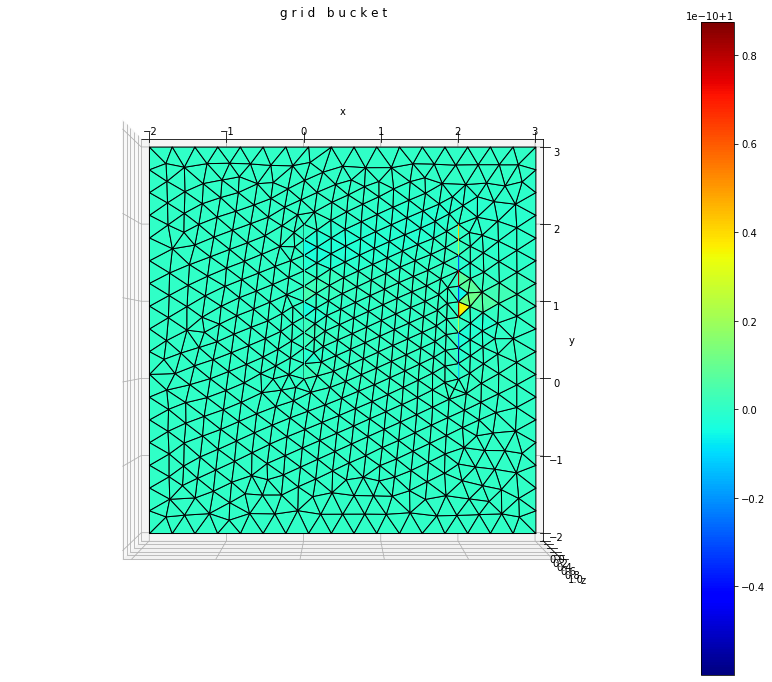

In [14]:
for i in range(n_steps):
    if np.isclose(i % save_every, 0):
        # Export existing solution (final export is taken care of below)
        assembler_Ca.distribute_variable(
        tracer1,
        variable_names=[Ca,transport.mortar_variable],
    )
        exporter1.write_vtu(export_field1, time_step=int(i // save_every))
    tracer1 = IEsolver_Ca(rhs_mass_Ca * tracer1 + rhs_source_adv_Ca)
    for g,d in gb:
        print("Ca")
        print(d[pp.STATE]["Ca"])
    print("FINE")
    
    
exporter1.write_vtu(export_field1, time_step=(n_steps // save_every))
time_steps = np.arange(
    0, parameter["t_max"] + parameter["time_step"], save_every * parameter["time_step"]
)
    
exporter1.write_pvd(time_steps)
transport.plot_tracer(Ca)
